# Transformación Bilineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Transformación Bilineal $\\omega = g(\\Omega)$')

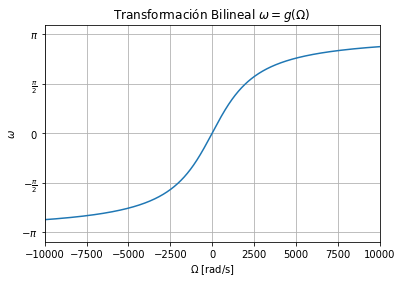

In [8]:
# Definiendo la relación en frecuencia
fs = 1000
T = 1/fs
alpha = 2/T

N = 1000
w = (np.arange(N)-N/2)/N * 2*np.pi
Omg = alpha*np.tan(w/2)

fig = plt.figure()
plt.plot(Omg,w)
plt.xlim([-1E4,1E4])
plt.xlabel('$\Omega$ [rad/s]')
plt.ylabel('$\omega$')
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],labels=['$-\pi$','$-\\frac{\pi}{2}$','$0$','$\\frac{\pi}{2}$','$\pi$'])
plt.grid('on')
plt.title('Transformación Bilineal $\omega = g(\Omega)$')

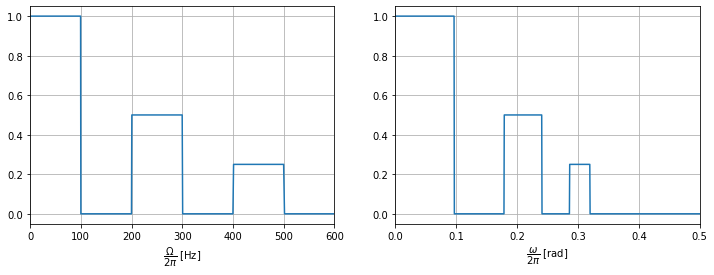

In [9]:
# Filtro Boxcar
N = 1000
w = np.arange(N)/N * np.pi
Omg = alpha*np.tan(w/2)

def boxcar(f,fc1,fc2):
    H = 1*np.logical_and(np.abs(f)>=fc1,np.abs(f)<=fc2)
    return H

Omg1 = 2*np.pi*100
Omg2 = 2*np.pi*200
Omg3 = 2*np.pi*300
Omg4 = 2*np.pi*400
Omg5 = 2*np.pi*500

Ha = boxcar(Omg,0,Omg1) + 0.5*boxcar(Omg,Omg2,Omg3) + 0.25*boxcar(Omg,Omg4,Omg5)

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(Omg/(2*np.pi),Ha)
plt.xlim([0,600])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w/(2*np.pi),Ha)
plt.xlim([0,0.5])
plt.xlabel('$\dfrac{\omega}{2\pi}$ [rad]')
plt.grid('on')


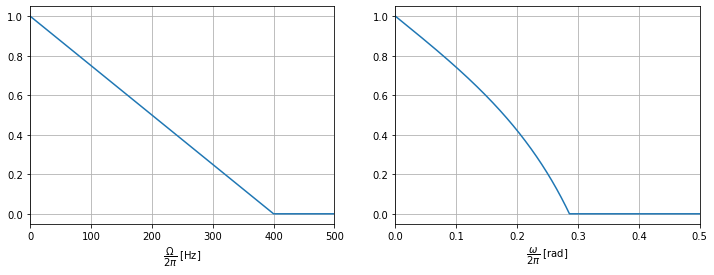

In [10]:
# Filtro Triangular
N = 1000
w = np.arange(N)/N * np.pi
Omg = alpha*np.tan(w/2)

def triangle(f,fc):
    H = (1-np.abs(f)/fc) * (np.abs(f)<=fc)
    return H

Omgc = 2*np.pi*400
Ha = triangle(Omg,Omgc)

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(Omg/(2*np.pi),Ha)
plt.xlim([0,500])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w/(2*np.pi),Ha)
plt.xlim([0,0.5])
plt.xlabel('$\dfrac{\omega}{2\pi}$ [rad]')
plt.grid('on')


[-1160.98126086 -480.89418391j -1160.98126086 +480.89418391j
  -480.89418391-1160.98126086j  -480.89418391+1160.98126086j
   480.89418391+1160.98126086j   480.89418391-1160.98126086j
  1160.98126086 +480.89418391j  1160.98126086 -480.89418391j]


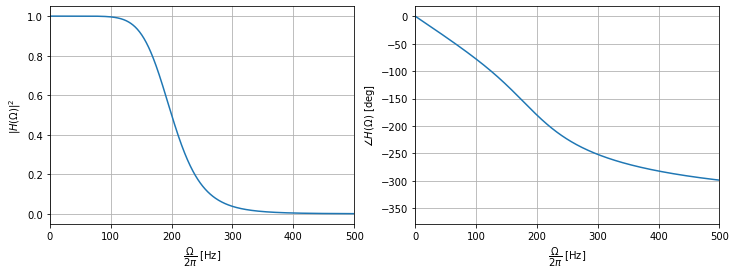

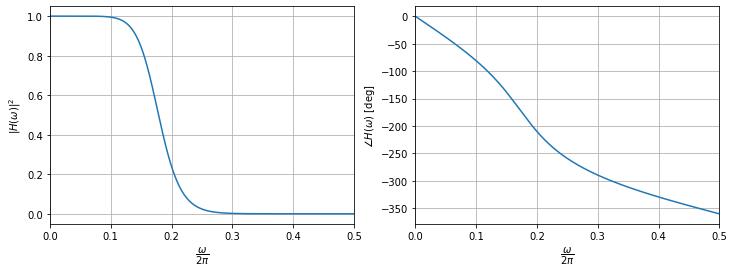

In [11]:
# Diseñando un Filtro Butterworth
alpha = 2/T

fc = 200
omg_c = 2*np.pi*fc
n_order = 4

# Polos del filtro Butterworth
coef = np.zeros(2*n_order+1)
coef[0] = 1
coef[2*n_order] = 1
roots = np.roots(coef)

s_roots = np.sort_complex(roots*1j*omg_c)
print(s_roots)

N = 1000
w = np.arange(N)/N * np.pi
omg = alpha*np.tan(w/2)

# Calculando coeficientes de la expansión en fracciones parciales
ck = np.ones(n_order,dtype=complex) * omg_c
for k in range(n_order):    
    for l in range(n_order):
        if k!=l:
            ck[k] = ck[k]*omg_c/(s_roots[k]-s_roots[l])

# Calculando la respuesta en frecuencia
Homg = 0
for k in range(n_order):    
    Homg = Homg + ck[k]/(1j*omg-s_roots[k])

fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi),np.abs(Homg)**2)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$|H(\Omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.unwrap(np.angle(Homg))*180/np.pi)
plt.xlim([0,fs/2])
plt.xlabel('$\dfrac{\Omega}{2\pi}$ [Hz]')
plt.ylabel('$\\angle H(\Omega)$ [deg]')
plt.grid('on')


fig = plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
plt.plot(w/(2*np.pi),np.abs(Homg)**2)
plt.xlim([0,0.5])
plt.xlabel('$\dfrac{\omega}{2\pi}$')
plt.ylabel('$|H(\omega)|^2$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(w/(2*np.pi),np.unwrap(np.angle(Homg))*180/np.pi)
plt.xlim([0,0.5])
plt.xlabel('$\dfrac{\omega}{2\pi}$')
plt.ylabel('$\\angle H(\omega)$ [deg]')
plt.grid('on')
